# Calculating Bond Option Adjusted Spread (OAS)

The asset swap spread and the option adjusted spread are widely used as measures of pure credit risk. In this notebook I calculate these quantities. This bond does not have embedded optionality. Hence OAS performs a role of a credit spread.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from financepy.utils import *
from financepy.products.bonds.bond import *

In [4]:
issue_date = Date(15, 5, 2010)
maturity_date = Date(15, 5, 2027)
coupon = 0.02375
freq_type = FrequencyTypes.SEMI_ANNUAL
accrual_type = DayCountTypes.ACT_ACT_ICMA
face = 100.0 # By setting the face to 100 we expect a price of par to be 100.0

In [5]:
bond = Bond(issue_date, maturity_date, coupon, freq_type, accrual_type, face)

In [6]:
print(bond)

OBJECT TYPE: Bond
ISSUE DATE: 15-MAY-2010
MATURITY DATE: 15-MAY-2027
COUPON: 0.02375
FREQUENCY: FrequencyTypes.SEMI_ANNUAL
ACCRUAL TYPE: DayCountTypes.ACT_ACT_ICMA
FACE AMOUNT: 100.0


## Option Adjusted Spread

In [11]:
from financepy.market.curves.discount_curve_flat import DiscountCurveFlat

In [12]:
liborFlatRate = 0.0275

In [13]:
settlement_date = Date(21, 7, 2017)

In [15]:
liborFlatCurve = DiscountCurveFlat(settlement_date, liborFlatRate, FrequencyTypes.SEMI_ANNUAL)

To get the OAS I need to know the bond price

In [16]:
clean_price = 99.780842  # I specified face to be 100 - if face is 1 then this must be 0.99780842

OAS is similar to ASW but actually subtly different measure of credit spread with a different definition and compounding annual_frequency. 

In [17]:
bond.option_adjusted_spread(settlement_date, clean_price, liborFlatCurve) * 10000

-34.95229384400636

## Vectorisations

We plot them both as a function of the Bond clean price.

In [18]:
clean_prices = np.linspace(70,130,10)

In [19]:
oass = bond.option_adjusted_spread(settlement_date, clean_prices, liborFlatCurve)

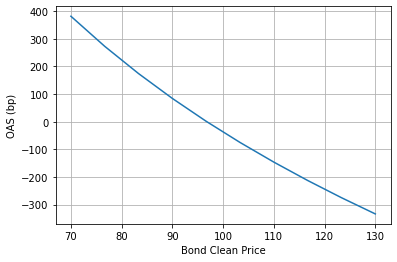

In [20]:
plt.plot(clean_prices,oass*10000)
plt.xlabel("Bond Clean Price")
plt.ylabel("OAS (bp)")
plt.grid()

Copyright (c) 2020 Dominic O'Kane